In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,Soil moisture,Soil temperature,Wind speed,Daily Light Integral,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,88.038721,31.828543,1.892905,16.347662,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,79.503274,34.418453,2.797165,23.580669,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,86.143296,32.859340,1.970928,19.398759,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,63.644394,30.984550,1.919235,20.751343,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,87.372776,34.000027,1.320308,15.884268,rice


In [4]:
crop.shape

(2200, 12)

In [5]:
crop.rename(columns={
  'Soil moisture':'soilMoisture',
  'Soil temperature':'soilTemprature',
  'Wind speed':'windSpeed',
  'Daily Light Integral':'dailyLightIntegral'
}, inplace=True)


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N                   2200 non-null   int64  
 1   P                   2200 non-null   int64  
 2   K                   2200 non-null   int64  
 3   temperature         2200 non-null   float64
 4   humidity            2200 non-null   float64
 5   ph                  2200 non-null   float64
 6   rainfall            2200 non-null   float64
 7   soilMoisture        2200 non-null   float64
 8   soilTemprature      2200 non-null   float64
 9   windSpeed           2200 non-null   float64
 10  dailyLightIntegral  2200 non-null   float64
 11  label               2200 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 206.4+ KB


In [7]:
crop.isnull().sum()

N                     0
P                     0
K                     0
temperature           0
humidity              0
ph                    0
rainfall              0
soilMoisture          0
soilTemprature        0
windSpeed             0
dailyLightIntegral    0
label                 0
dtype: int64

In [8]:
crop.duplicated().sum()

np.int64(0)

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,soilMoisture,soilTemprature,windSpeed,dailyLightIntegral
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,53.440699,26.177276,2.917072,26.104329
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,13.863447,4.016621,1.063329,5.143982
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,25.060275,15.000074,1.002332,15.080740
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,43.183786,23.364613,2.167491,22.061248
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,50.981668,26.388475,2.779640,25.777879
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,62.379657,29.134557,3.627558,29.948467
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,89.731014,34.973251,5.973076,39.739026


In [10]:
cropCorr = crop.corr(numeric_only=True)

<Axes: >

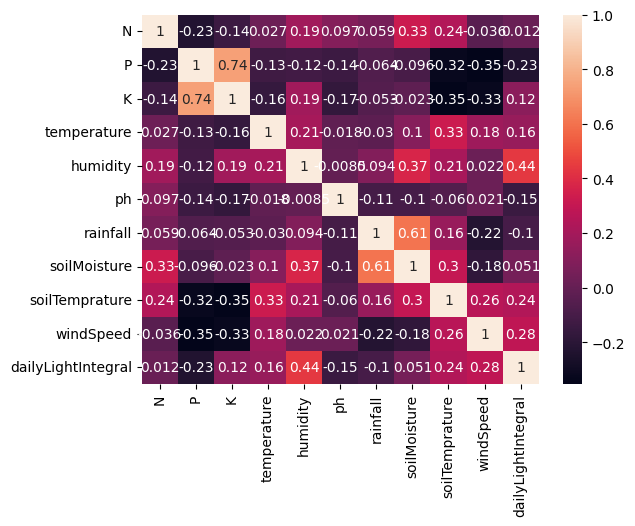

In [11]:
import seaborn as sns
sns.heatmap(cropCorr, annot=True, cbar=True)

In [12]:
crop.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [13]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

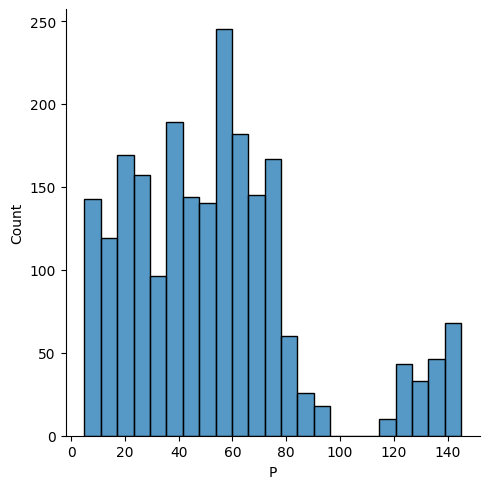

In [14]:
import matplotlib.pyplot as plt
sns.displot(crop['P'])
plt.show()

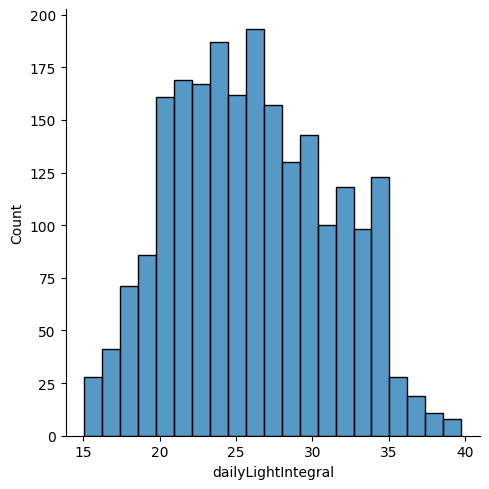

In [15]:
import matplotlib.pyplot as plt
sns.displot(crop['dailyLightIntegral'])
plt.show()

In [16]:
crop_labels = crop.label.unique()

In [17]:
crop_dict = {crop: i+1 for i, crop in enumerate(crop_labels)}

print(crop_dict)

{'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}


In [18]:
crop['label'] = crop['label'].map(crop_dict)

In [19]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,soilMoisture,soilTemprature,windSpeed,dailyLightIntegral,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,63.739890,18.470802,1.349807,17.223366,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,60.987204,19.476733,1.085350,16.838216,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,68.964640,19.938169,2.220914,17.179903,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,69.808265,23.416257,2.170436,17.096780,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,67.186282,18.686325,2.839320,24.690094,22


In [20]:
crop.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [21]:
crop.label.value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [22]:
x = crop.drop('label', axis=1)
y = crop['label']

In [23]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall,soilMoisture,soilTemprature,windSpeed,dailyLightIntegral
0,90,42,43,20.879744,82.002744,6.502985,202.935536,88.038721,31.828543,1.892905,16.347662
1,85,58,41,21.770462,80.319644,7.038096,226.655537,79.503274,34.418453,2.797165,23.580669
2,60,55,44,23.004459,82.320763,7.840207,263.964248,86.143296,32.859340,1.970928,19.398759
3,74,35,40,26.491096,80.158363,6.980401,242.864034,63.644394,30.984550,1.919235,20.751343
4,78,42,42,20.130175,81.604873,7.628473,262.717340,87.372776,34.000027,1.320308,15.884268


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1760, 11)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [29]:
models = {
  'LogisticRegression' : LogisticRegression(),
  'GaussianNB' : GaussianNB(),
  'SVC' : SVC(),
  'KNeighborsClassifier' : KNeighborsClassifier(),
  'DecisionTreeClassifier' : DecisionTreeClassifier(),
  'ExtraTreeClassifier' : ExtraTreeClassifier(),
  'RandomForestClassifier' : RandomForestClassifier(),
  'BaggingClassifier' : BaggingClassifier(),
  'GradientBoostingClassifier' : GradientBoostingClassifier(),
  'AdaBoostClassifier' : AdaBoostClassifier(),
}

In [30]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print(f"{name} model with accuracy: {score}")

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model with accuracy: 0.975
GaussianNB model with accuracy: 0.9977272727272727
SVC model with accuracy: 0.9772727272727273
KNeighborsClassifier model with accuracy: 0.9795454545454545
DecisionTreeClassifier model with accuracy: 0.9795454545454545
ExtraTreeClassifier model with accuracy: 0.8613636363636363
RandomForestClassifier model with accuracy: 1.0
BaggingClassifier model with accuracy: 0.9931818181818182
GradientBoostingClassifier model with accuracy: 0.990909090909091
AdaBoostClassifier model with accuracy: 0.14545454545454545


In [31]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.77%


In [32]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'soilMoisture', 'soilTemprature', 'windSpeed', 'dailyLightIntegral',
       'label'],
      dtype='object')

In [33]:
reverse_crop_dict = {v: k for k, v in crop_dict.items()}

def recommendations(N, P, K, temperature, humidity, ph, rainfall, soilMoisture, soilTemprature, windSpeed, DLI):
  features = np.array([[N, P, K, temperature, humidity, ph, rainfall, soilMoisture, soilTemprature, windSpeed, DLI]])
  scaled_features = scaler.transform(features)
  prediction = model.predict(scaled_features)
  crop_number = prediction[0]
  crop_name = reverse_crop_dict[crop_number]
  print(f"Predicted Crop: {crop_name}")
  return crop_name


In [34]:
N = 90
P = 42
K = 77
temperature = 29.46
humidity = 57.88
ph = 6.91
rainfall = 142.34
soilMoisture = 62.15
soilTemprature = 33.29
windSpeed = 3.84
dailyLightIntegral = 12.67

predict = recommendations(N, P, K, temperature, humidity, ph, rainfall, soilMoisture, soilTemprature, windSpeed, dailyLightIntegral)

print(predict)


Predicted Crop: jute
jute


C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
import random

N = random.randint(10, 100)
P = random.randint(10, 100)
K = random.randint(10, 100)
temperature = round(random.uniform(15, 35), 2)
humidity = round(random.uniform(30, 90), 2)
ph = round(random.uniform(4.5, 8.5), 2)
rainfall = round(random.uniform(50, 300), 2)
soilMoisture = round(random.uniform(10, 90), 2)
soilTemprature = round(random.uniform(20, 40), 2)
windSpeed = round(random.uniform(0.5, 10), 2)
dailyLightIntegral = round(random.uniform(5, 25), 2)

predict = recommendations(N, P, K, temperature, humidity, ph, rainfall, soilMoisture, soilTemprature, windSpeed, dailyLightIntegral)

print(predict)



Predicted Crop: jute
jute


C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('standardscalar.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
